In [60]:
# Import required libraries and dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [61]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [62]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [63]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)


In [64]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_data_df['crypto_name'] = market_data_df.index

# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index('crypto_name')

# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [65]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))  
# Create an empty list to store the inertia values
inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()  

c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914


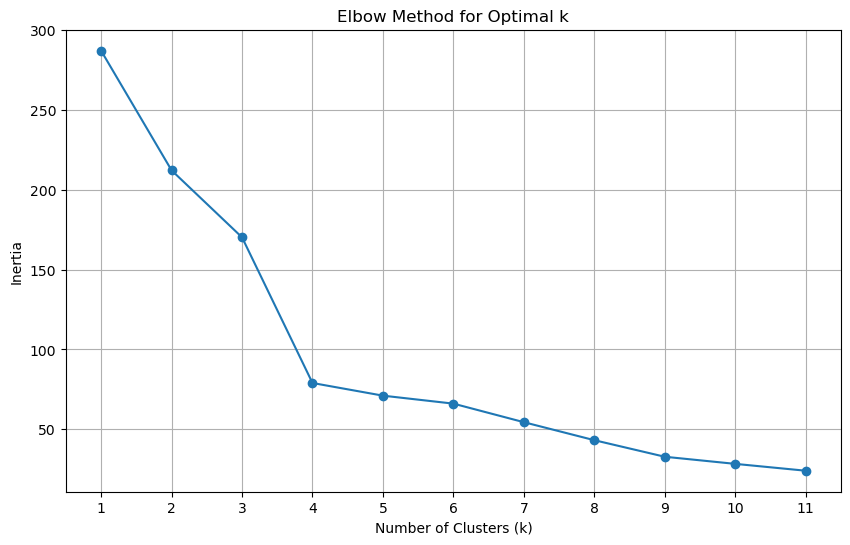

In [66]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to the k values
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:****Answer:** The best value for `k` is 4. This is determined by observing the Elbow Method plot, where the inertia values decrease significantly up to `k=4`, after which the decrease becomes less pronounced. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [67]:

# Initialize the K-Means model using the best value for k
k = 4  # Best value for k determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)

In [68]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)  

c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [69]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [70]:
# Create a copy of the DataFrame
df_copy = scaled_data_df.copy()  

In [71]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['crypto_cluster'] = predicted_clusters  # Add this line to include the predicted clusters

# Display sample data
df_copy.head() 

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
crypto_name,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: title={'center': 'Scatter Plot of Price Change Percentages'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

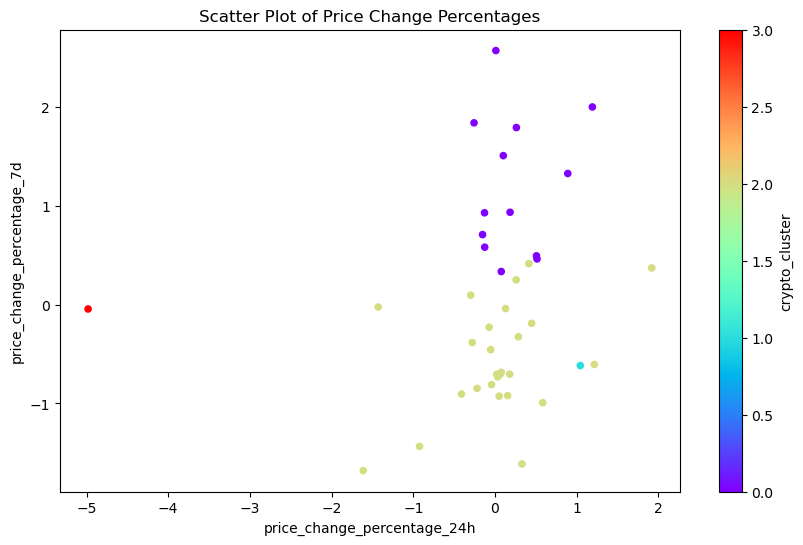

In [72]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df_copy.plot.scatter(x='price_change_percentage_24h', 
                     y='price_change_percentage_7d', 
                     c='crypto_cluster', 
                     colormap='rainbow', 
                     figsize=(10, 6), 
                     title='Scatter Plot of Price Change Percentages')

### Optimize Clusters with Principal Component Analysis.

In [73]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)  

In [74]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)

# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, index=scaled_data_df.index, columns=['PCA1', 'PCA2', 'PCA3'])

# View the first five rows of the DataFrame.
pca_df.head()

,PCA1,PCA2,PCA3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [75]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841



In [76]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, index=scaled_data_df.index, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
pca_df['crypto_name'] = scaled_data_df.index

# Set the coin_id column as index
pca_df = pca_df.set_index('crypto_name')

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [77]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))  

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


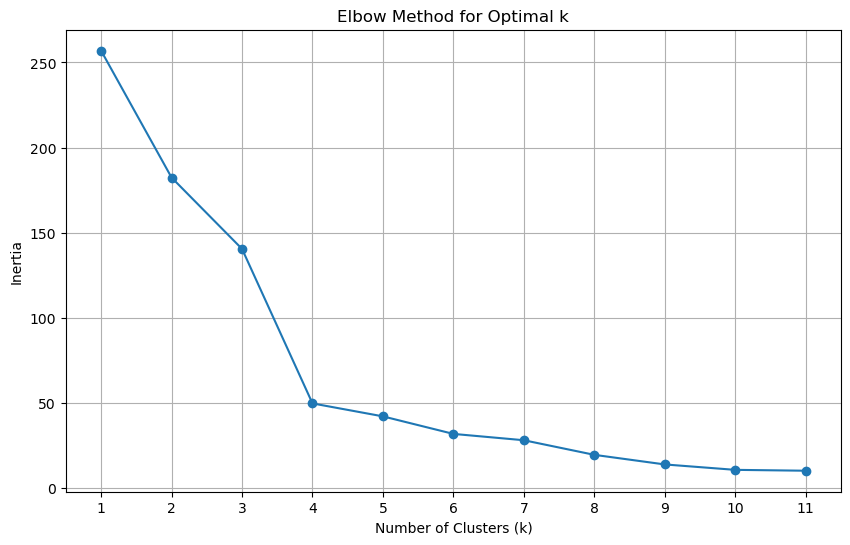

In [78]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to the k values
plt.grid()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data, based on the output from the previous cell, is **4**. This is determined by observing the Elbow Method plot, where the inertia values decrease significantly up to `k=4`, after which the decrease becomes less pronounced.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
**No, it does not differ.** The best value for `k` found using both the original data and the PCA data is **4**.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [79]:
# Initialize the K-Means model using the best value for k
k = 4  # Best value for k determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)  

In [80]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)  

c:\Users\degar\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [81]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans.predict(pca_df) 

# Print the resulting array of cluster values.
print(predicted_clusters_pca) 

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [82]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = pca_df.copy()  

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['crypto_cluster'] = predicted_clusters_pca  

# Display sample data
df_pca_copy.head() 

,PCA1,PCA2,PCA3,crypto_cluster
crypto_name,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [83]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.

df_pca_copy.hvplot.scatter(x='PCA1', y='PCA2', c='crypto_cluster', 
                            colormap='viridis', 
                            title='PCA Scatter Plot of Cryptocurrencies', 
                            xlabel='PCA1', ylabel='PCA2', 
                            size=100, alpha=0.7)

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [84]:
# Use the columns from the original scaled DataFrame as the index.

scaled_data_df = scaled_data_df.set_index(market_data_df.columns.tolist())  

In [86]:
# Display the loadings DataFrame
print(loadings_df)

# Identify the strongest positive and negative influences for each principal component
for i in range(loadings_df.shape[1]):
    pc_name = f'PC{i+1}'
    strongest_positive = loadings_df[pc_name].idxmax()
    strongest_negative = loadings_df[pc_name].idxmin()
    print(f"For {pc_name}:")
    print(f"  Strongest Positive Influence: {strongest_positive} ({loadings_df[pc_name].max()})")
    print(f"  Strongest Negative Influence: {strongest_negative} ({loadings_df[pc_name].min()})")

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.680811  0.565145 -0.245896
price_change_percentage_7d   -0.167343  0.358866  0.885235
price_change_percentage_14d  -0.014969  0.852724  0.392828
price_change_percentage_30d   0.312892  0.887070 -0.204255
price_change_percentage_60d   0.523382  0.684874 -0.406139
price_change_percentage_200d  0.971186  0.043763  0.044655
price_change_percentage_1y    0.928565 -0.237931  0.236620
For PC1:
  Strongest Positive Influence: price_change_percentage_200d (0.9711861628732441)
  Strongest Negative Influence: price_change_percentage_24h (-0.6808108404759977)
For PC2:
  Strongest Positive Influence: price_change_percentage_30d (0.8870700709137848)
  Strongest Negative Influence: price_change_percentage_1y (-0.2379313166287215)
For PC3:
  Strongest Positive Influence: price_change_percentage_7d (0.8852349400295455)
  Strongest Negative Influence: price_change_percentage_60d (-0.40613897613629474)


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
For PC1:
  Strongest Positive Influence: price_change_percentage_200d (0.9711861628732441)
  Strongest Negative Influence: price_change_percentage_24h (-0.6808108404759977)
For PC2:
  Strongest Positive Influence: price_change_percentage_30d (0.8870700709137848)
  Strongest Negative Influence: price_change_percentage_1y (-0.2379313166287215)
For PC3:
  Strongest Positive Influence: price_change_percentage_7d (0.8852349400295455)
  Strongest Negative Influence: price_change_percentage_60d (-0.40613897613629474)
    